## 高等数学问题符号解

### 1. 求极限

$ \lim\limits_{x \to 0} \frac{sinx}{x} = 1 , \qquad \lim\limits_{x \to +\infty} \left( 1 + \frac{1}{x} \right)^x = e $

`sympy.limit(e, z, z0, dir='+')`

In [1]:
from sympy import symbols
from sympy import limit, sin, oo

x = symbols('x')
print(limit(sin(x)/x, x, 0))
print(limit((1 + 1/x)**x, x, oo))

1
E


### 2. 求导数

$ z = sinx + x^2 e^y $，求 $ \frac{\partial^2 z}{\partial x^2}, \frac{\partial z}{\partial y} $

`sympy.diff(f, *symbols, **kwargs)`

In [2]:
from sympy import symbols
from sympy import diff, sin, exp

x, y = symbols('x y')
z = sin(x) + x**2 * exp(y)          # 构造符号表达式
print("关于x的二阶偏导数: ", diff(z, x, 2))
print("关于y的一阶偏导数: ", diff(z, y, 1))

关于x的二阶偏导数:  2*exp(y) - sin(x)
关于y的一阶偏导数:  x**2*exp(y)


### 3. 级数求和
$ \sum\limits_{k = 1}^n k^2 = \frac{n(n+1)(2n+1)}{6} $

$ \sum\limits_{k = 1}^{\infty} \frac{1}{k^2} = \frac{\pi^2}{6} $

`summation(f, (i, a, b))` $ = \sum\limits_{i = a}^{b} f $

`factor(f, *gens, deep=False, **args)`  计算表达式的因式分解

In [3]:
from sympy import symbols
from sympy import summation, oo, factor

k, n = symbols('k n')
print(summation(k**2, (k, 1, n)))
print(factor(summation(k**2, (k, 1, n))))           # 结果因式分解
print(summation(1/k**2, (k, 1, oo)))

n**3/3 + n**2/2 + n/6
n*(n + 1)*(2*n + 1)/6
pi**2/6


### 4. Taylor展开

`sin(x)`在0处3，5，7阶`Taylor`展开

`series(expr, x=None, x0=0, n=6, dir='+')`

In [4]:
from sympy import symbols, sin, series

x = symbols('x')
y = sin(x)
for i in range(3, 8, 2):
    print("%d阶: "%i, series(y, x, 0, i))

3阶:  x + O(x**3)
5阶:  x - x**3/6 + O(x**5)
7阶:  x - x**3/6 + x**5/120 + O(x**7)


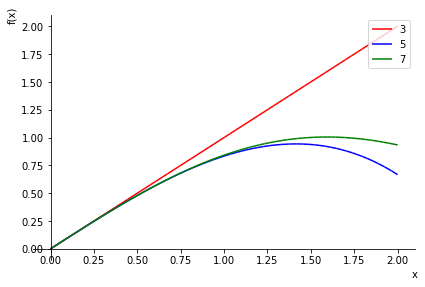

In [5]:
from sympy.plotting import plot
from sympy import symbols

x = symbols('x')
p1 = plot(x, (x, 0, 2), line_color = 'r', label = '3', show = False)
p2 = plot(x - x**3 / 6, (x, 0, 2), line_color = 'b', label = '5', show = False)
p3= plot(x - x**3 / 6 + x**5 / 120, (x, 0, 2), line_color = 'g', label = '7', show = False)
p1.extend(p2)
p1.extend(p3)
p1.legend = True
p1.show()

### 5. 求不定积分和定积分

$ \int_{0}^{\pi} sin(2x)dx = 0, \qquad \int_{0}^{+\infty} \frac{sinx}{x}dx = \frac{\pi}{2} $

$ \int sec^3 x dx $

`integrate(f, var, ...)`

In [6]:
from sympy import symbols
from sympy import integrate, sin, sec, pi, oo

x = symbols('x')
print(integrate(sin(2*x), (x, 0, pi)))
print(integrate(sin(x) / x, (x, 0, oo)))
print(integrate(sec(x)**3, x))

0
pi/2
-log(sin(x) - 1)/4 + log(sin(x) + 1)/4 - sin(x)/(2*sin(x)**2 - 2)


### 6. 求解代数方程组符号解

$ x^3 = 1, \qquad (x-2)^2(x-1)^3 = 0 $

$ x^2 + x + 1 = 0 $

`solve(f, *symbols, **flags)`

`roots()`

In [7]:
from sympy import symbols
from sympy import solve, roots

x, y = symbols('x y')
print(solve(x**3 - 1, x))
print(solve((x - 2)**2 * (x - 1)**3, x))
print(solve(x**2 + x + 1, x))
#  roots可以得到重根信息
print(roots((x - 2)**2 * (x - 1)**3, x))


[1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]
[1, 2]
[-1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]
{2: 2, 1: 3}


 解代数方程组

$$
    \begin{cases}
        x^2 + y^2 = 1 \\
        x - y = 1
    \end{cases}
$$

In [8]:
from sympy import symbols
from sympy import solve

x, y = symbols('x y')
s = solve([x**2 + y**2 - 1, x - y], [x, y], dict = True)
print(s)

[{x: -sqrt(2)/2, y: -sqrt(2)/2}, {x: sqrt(2)/2, y: sqrt(2)/2}]


### 7. 求驻点

$ z = xy + x^2 e^y $

In [9]:
from sympy import symbols
from sympy import diff, solve, exp

x, y = symbols('x y')
z = x*y + x**2 * exp(y)
s = solve([diff(z, x, 1), diff(z, y, 1)], [x, y], dict = True)
print(s)

[{x: 0, y: 0}, {x: -exp(-2), y: 2}]
